In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Reset index temporarily to access 'coin_id' if it was already set as the index
df_market_data.reset_index(inplace=True)

# Extract the columns to scale (excluding 'coin_id')
columns_to_scale = df_market_data.columns[1:]

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df_market_data[columns_to_scale])


In [9]:
# Create a DataFrame with the scaled data
scaled_crypto_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Copy the crypto names from the original DataFrame
scaled_crypto_df['coin_id'] = df_market_data['coin_id']

# Set the coin_id column as index
scaled_crypto_df = scaled_crypto_df.set_index('coin_id')

# Display the scaled DataFrame
scaled_crypto_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [12]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))

In [13]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(scaled_crypto_df)
    
    # Append the inertia to the inertia list
    inertia_values.append(kmeans.inertia_)

In [14]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


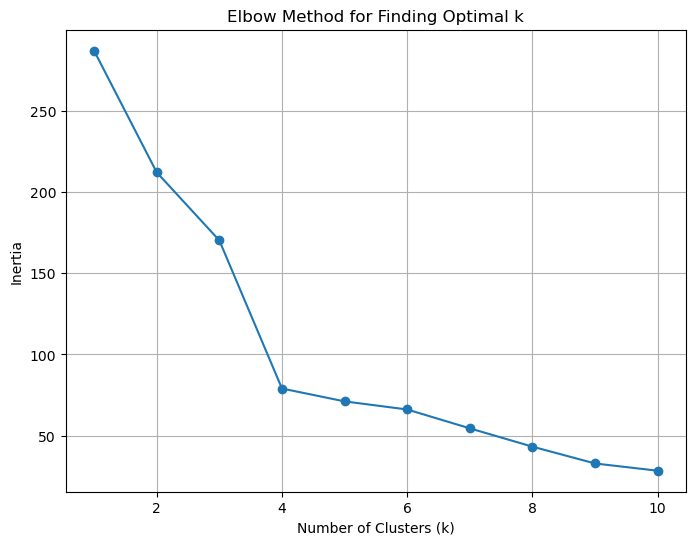

In [15]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Method for Finding Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
# Save the plot as a PNG file in the 'images' folder
plt.savefig('images/elbow_plot.png')
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the elbow plot, the best value for k is typically identified where the inertia starts to level off, forming an "elbow" in the graph. In this case, the elbow appears to be around k = 4.
The sharp decrease in inertia between k = 1 to k = 4 suggests that these additional clusters provide significant improvement, but beyond k = 4, the inertia decreases at a much slower rate. Therefore, k = 4 is the optimal number of clusters.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [19]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [20]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(scaled_crypto_df)

KMeans(n_clusters=4, random_state=42)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = kmeans_model.predict(scaled_crypto_df)

# Print the resulting array of cluster values.
predicted_clusters

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [22]:
# Create a copy of the scaled DataFrame
clustered_crypto_df = scaled_crypto_df.copy()

In [23]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
clustered_crypto_df['Cluster'] = predicted_clusters

# Display the copy of the scaled DataFrame
clustered_crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [24]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = clustered_crypto_df.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',
    colormap='Category10',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters'
)

# Step 5: Save the plot as an HTML file in the 'images' folder
hvplot.save(scatter_plot, 'images/crypto_clusters.html')

# Display the scatter plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [27]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [28]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(scaled_crypto_df)

# View the scaled PCA data
pca_columns = ['PC1', 'PC2', 'PC3']
pca_df = pd.DataFrame(data=pca_data, columns=pca_columns, index=scaled_crypto_df.index)


In [29]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()


In [30]:
print(f"Explained variance for each component: {explained_variance}")
print(f"Total explained variance: {total_explained_variance}")

# Step 5: View the first few rows of the PCA-transformed data
pca_df.head()

Explained variance for each component: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.8950316570309842


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The explained variance for each component is:
PC1: 37.20%
PC2: 34.70%
PC3: 17.60%
The total explained variance of the three principal components is 89.50%.
This means that these three principal components together explain 89.50% of the variance in the original dataset, which is a very good reduction while retaining most of the information.

In [32]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])


# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = scaled_crypto_df.index

# Set the coin_id column as index
pca_df = pca_df.set_index('coin_id')

# Display the scaled PCA DataFrame
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [35]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))


In [36]:
# Create an empty list to store the inertia values
inertia_values = []

# Step Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA data
    kmeans.fit(pca_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


In [37]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)


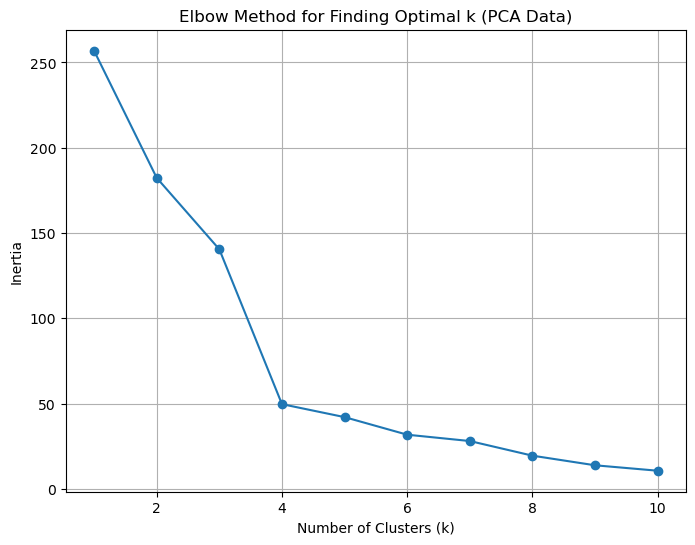

In [38]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.title('Elbow Method for Finding Optimal k (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Save the plot in the images folder
plt.savefig('images/elbow_plot_pca.png')

plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Based on the elbow plot using the PCA data, the best value for k appears to be k = 4. This is where the inertia starts to level off, indicating diminishing returns for increasing the number of clusters beyond 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best k value using the original data was also k = 4. This means that both the original scaled data and the PCA-transformed data suggest the same optimal number of clusters.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [41]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=42)

In [42]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [43]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [44]:
# Create a copy of the scaled PCA DataFrame
pca_clustered_df = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_clustered_df['Cluster'] = pca_clusters

# Display the copy of the scaled PCA DataFrame
pca_clustered_df.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [45]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_scatter_plot = pca_clustered_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    colormap='Category10',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (PCA Data)'
)

# Save the plot as an HTML file in the 'images' folder
hvplot.save(pca_scatter_plot, 'images/pca_crypto_clusters.html')

# Display the plot
pca_scatter_plot


:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

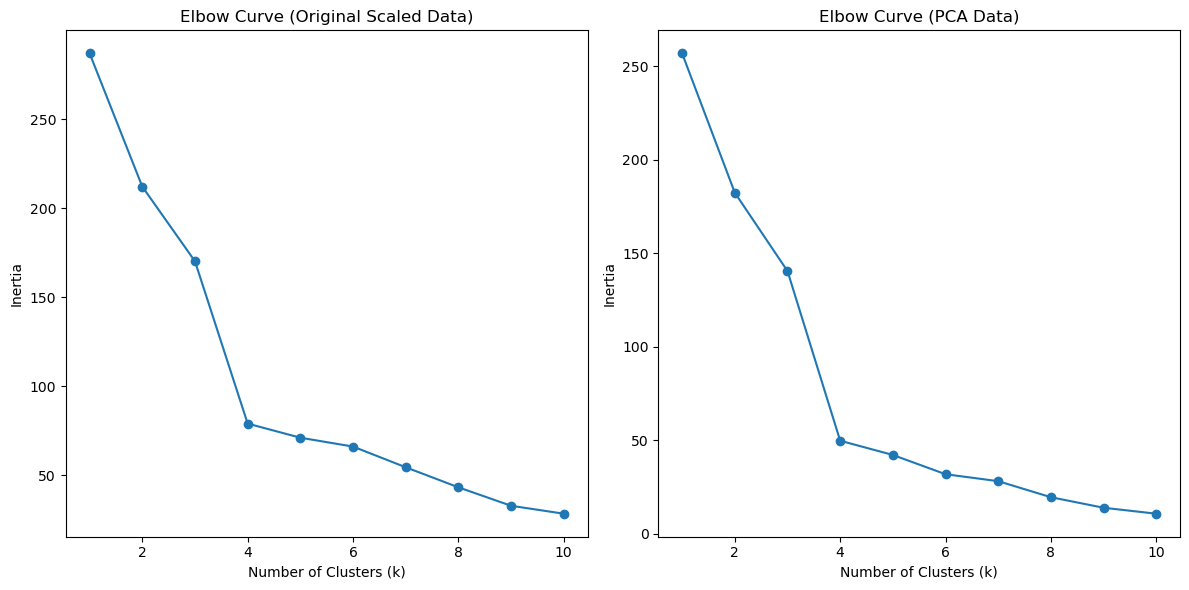

In [47]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(12, 6))

# Plot the original Elbow curve
plt.subplot(1, 2, 1)
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve (Original Scaled Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plot the PCA Elbow curve
plt.subplot(1, 2, 2)
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Save the composite elbow plot
plt.savefig('images/composite_elbow_plot.png')

plt.tight_layout()
plt.show()


In [48]:
# Composite plot to contrast the clusters
import panel as pn
pn.extension()

# Step 2: Composite plot to contrast the clusters
# Display both scatter plots side by side
cluster_composite = (scatter_plot + pca_scatter_plot).cols(2)

# Save the composite cluster plot as an HTML file
hvplot.save(cluster_composite, 'images/composite_cluster_plot.html')

# Display the composite plot
cluster_composite

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
Using fewer features (via PCA) simplifies the dataset while still retaining most of the important information. The PCA transformation reduced the data from multiple dimensions to just three, making it easier to visualize and compute clusters.
Despite the dimensionality reduction, the clustering results remain largely consistent, as seen from the fact that both the elbow method and clustering outcomes indicate that k = 4 is the optimal number of clusters in both cases.
The main impact of using fewer features is that it reduces computation time and complexity, but still achieves similar results, particularly when PCA preserves most of the variance (in this case, 89.50%).